# Day 12
## Puzzle 1

In [1]:
def read_input(filename):
    """Read input file and process."""
    with open(filename, 'r') as f:
        rawlines = f.readlines()
    lines = [i.replace('\n', '') for i in rawlines]
    initial_state = lines[0].split(':')[1].strip()
    evolve_dict = {i.split('=>')[0].strip(): i.split('=>')[1].strip() for i in lines[2:]}
    return initial_state, evolve_dict

In [2]:
test_initial_state, test_evolve_dict = read_input("test_input.txt")
print(test_initial_state, test_evolve_dict)

#..#.#..##......###...### {'...##': '#', '..#..': '#', '.#...': '#', '.#.#.': '#', '.#.##': '#', '.##..': '#', '.####': '#', '#.#.#': '#', '#.###': '#', '##.#.': '#', '##.##': '#', '###..': '#', '###.#': '#', '####.': '#'}


In [3]:
def evolve(initial_state, evolve_dict, furthest_left_pot):
    out = ''
    furthest_left_pot -= 2
    initial_state = '..' + initial_state + '...'
    for i in range(len(initial_state)):
        if i-2 < 0:
            pre_delta = 2-i
            pre_s = "."*pre_delta
            post_delta = 0
            post_s = ''
        elif i + 2 > len(initial_state) - 1:
            pre_delta = 0
            pre_s = ''
            post_delta = i + 2 - (len(initial_state) - 1)
            post_s = '.'*post_delta
        else:
            pre_delta = 0
            pre_s = ''
            post_delta = 0
            post_s = ''
        s = pre_s + initial_state[i-2+pre_delta:i+3-post_delta] + post_s
        #print(i)
        #print(pre_delta)
        #print(pre_s)
        #print(post_delta)
        #print(post_s)
        #print(s)
        assert len(s) == 5
        try:
            out = out + evolve_dict[s]
        except KeyError:
            out = out + '.'
    first_idx = out.index("#")
    last_idx = out.rindex("#") + 1
    return out[first_idx:last_idx], furthest_left_pot + first_idx

def many_generations(initial_state, evolve_dict, furthest_left_pot, generations):
    for i in range(generations):
        if i % 10000 == 0:
            print(i)
        initial_state, furthest_left_pot = evolve(initial_state, evolve_dict, furthest_left_pot)
    return initial_state, furthest_left_pot

def puzzle1_solution(state, leftmost_pot):
    out = 0
    for i, plant in enumerate(state):
        if plant == '#':
            out += i + leftmost_pot
    return out

In [4]:
print(evolve(test_initial_state, test_evolve_dict,0))
test_state, test_leftmost = many_generations(test_initial_state, test_evolve_dict, 0, 20)
print(test_state, test_leftmost)

('#...#....#.....#..#..#..#', 0)
0
#....##....#####...#######....#.#..## -2


In [5]:
assert puzzle1_solution(test_state, leftmost_pot=-2) == 325

In [6]:
initial_state, evolve_dict = read_input("input.txt")
state, leftmost = many_generations(initial_state, evolve_dict, 0, 20)
print("Puzzle 1 Solution is", puzzle1_solution(state, leftmost))

0
Puzzle 1 Solution is 1696


In [7]:
#state, leftmost = many_generations(initial_state, evolve_dict, 0, 50000000000)
#print("Puzzle 2 Solution is", puzzle1_solution(state, leftmost))

## Puzzle 2

In [8]:
def find_cycle(initial_state, evolve_dict, furthest_left_pot, generations=1000000):
    outdict = {}
    for i in range(generations):
        if i % 10000 == 0:
            print(i)
        initial_state, furthest_left_pot = evolve(initial_state, evolve_dict, furthest_left_pot)
        key = initial_state+str(furthest_left_pot)
        if key in outdict:
            print("Found cycle!")
            print(i)
            print(outdict[key])
            break
        else:
            outdict[key] = i

In [9]:
#find_cycle(initial_state, evolve_dict, 0)
# tried and failed to find a cycle

In [10]:
initial_state, evolve_dict = read_input("input.txt")
print(initial_state)
print(evolve_dict)

#..####.##..#.##.#..#.....##..#.###.#..###....##.##.#.#....#.##.####.#..##.###.#.......#............
{'##...': '.', '##.##': '.', '.#.#.': '#', '#..#.': '.', '#.###': '#', '.###.': '.', '#.#..': '.', '##..#': '.', '.....': '.', '...#.': '.', '.#..#': '.', '####.': '#', '...##': '#', '..###': '#', '#.#.#': '#', '###.#': '#', '#...#': '#', '..#.#': '.', '.##..': '#', '.#...': '#', '.##.#': '#', '.####': '.', '.#.##': '.', '..##.': '.', '##.#.': '.', '#.##.': '.', '#..##': '.', '###..': '.', '....#': '.', '#####': '#', '#....': '.', '..#..': '#'}


In [11]:
def find_sum_growth(initial_state, evolve_dict, furthest_left_pot, generations=1000):
    out = []
    for i in range(generations):
        if i % 10000 == 0:
            print(i)
        initial_state, furthest_left_pot = evolve(initial_state, evolve_dict, furthest_left_pot)
        out.append(puzzle1_solution(initial_state, furthest_left_pot))
    return out

In [12]:
out = find_sum_growth(initial_state, evolve_dict, 0)

0


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

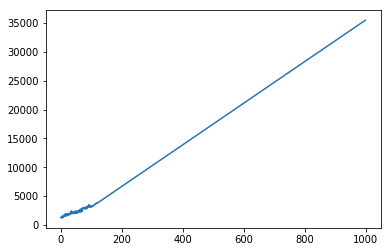

In [17]:
plt.plot(out)

In [18]:
# holy shit, its a line! adds 36 everything once things settle down

In [26]:
print("Puzzle 2 Answer is:", out[999] + 36*(50000000000-1000))

Puzzle 2 Answer is: 1799999999458


6730